# Projeto 2 - MC833
## Alunos:
1. Gabriel Affonso - RA:
2. Luiz Cartolano - RA: 183012

Import das bibliotecas

In [15]:
import pandas as pd
import numpy as np
import pdb
import matplotlib.pyplot as plt
import math
import scipy.stats

## Load dos dados

Load do dataframe com todos os dados

In [8]:
df_full = pd.read_csv('tempos_redes_2.csv', sep=',').drop(columns=['Unnamed: 3','Unnamed: 7'])
df_full

,Tempo Server,Tempo Total,Tempo de transporte,tempo server tcp,tempo cliente tcp,tempo transporte,dif tcp - udp
0,0.000023,0.000080,0.000057,0.000007,0.000088,0.000081,0.000024
1,0.000006,0.000062,0.000056,0.000007,0.000088,0.000081,0.000025
2,0.000006,0.000062,0.000056,0.000006,0.000080,0.000074,0.000018
3,0.000006,0.000032,0.000026,0.000006,0.000085,0.000079,0.000053
4,0.000004,0.000067,0.000063,0.000006,0.000058,0.000052,-0.000011
5,0.000005,0.000033,0.000028,0.000006,0.000051,0.000045,0.000017
6,0.000005,0.000071,0.000066,0.000006,0.000065,0.000059,-0.000007
7,0.000004,0.000033,0.000029,0.000006,0.000062,0.000056,0.000027
8,0.000006,0.000041,0.000035,0.000006,0.000025,0.000019,-0.000016
9,0.000010,0.000037,0.000027,0.000005,0.000053,0.000048,0.000021


Load do dataframe sem os dados que o TCP foi mais rapido que o UDP

In [13]:
df_estranho = df[df['dif tcp - udp'] < 0]

In [14]:
df_no_neg = pd.concat([df_full, df_estranho]).drop_duplicates(keep=False)
df_no_neg

,Tempo Server,Tempo Total,Tempo de transporte,tempo server tcp,tempo cliente tcp,tempo transporte,dif tcp - udp
0,0.000023,0.000080,0.000057,0.000007,0.000088,0.000081,0.000024
1,0.000006,0.000062,0.000056,0.000007,0.000088,0.000081,0.000025
2,0.000006,0.000062,0.000056,0.000006,0.000080,0.000074,0.000018
3,0.000006,0.000032,0.000026,0.000006,0.000085,0.000079,0.000053
5,0.000005,0.000033,0.000028,0.000006,0.000051,0.000045,0.000017
7,0.000004,0.000033,0.000029,0.000006,0.000062,0.000056,0.000027
9,0.000010,0.000037,0.000027,0.000005,0.000053,0.000048,0.000021
11,0.000011,0.000040,0.000029,0.000006,0.000062,0.000056,0.000027
13,0.000006,0.000033,0.000027,0.000006,0.000069,0.000063,0.000036
14,0.000005,0.000061,0.000056,0.000005,0.000071,0.000066,0.000010


## Servidor TCP

### Cálculo da média, desvio padrão e intervalo de confiança - Todos os dados

#### TEMPO TOTAL

In [35]:
tempo_total = df_full['tempo cliente tcp']
media_total = df_full['tempo cliente tcp'].mean()
desvio_total = df_full['tempo cliente tcp'].std()
intervalo_confianca_total = '(' + str(media_total - (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ',' + str(media_total + (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ')'

print("Informacoes TCP - TODOS OS DADOS - TEMPO TOTAL:")
print("Media: ", media_total)
print("Desvio Padrao: ", desvio_total)
print("Intervalo de Confiança: ", intervalo_confianca_total)

Informacoes TCP - TODOS OS DADOS - TEMPO TOTAL:
Media:  5.728222222222227e-05
Desvio Padrao:  2.004134534957883e-05
Intervalo de Confiança:  (5.597285432604979e-05,5.859159011839475e-05)


#### TEMPO COMUNICACAO

In [27]:
tempo_comunicacao = df_full['tempo transporte']
media_comunicacao = df_full['tempo transporte'].mean()
desvio_comunicacao = df_full['tempo transporte'].std()
intervalo_confianca_comunicacao  = '(' + str(media_comunicacao - (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ',' + str(media_comunicacao + (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ')'

print("Informacoes TCP - TODOS OS DADOS - TEMPO COMUNICACAO:")
print("Media: ", media_comunicacao)
print("Desvio Padrao: ", desvio_comunicacao)
print("Intervalo de Confiança: ", intervalo_confianca_comunicacao)

Informacoes TCP - TODOS OS DADOS - TEMPO COMUNICACAO:
Media:  5.127777777777777e-05
Desvio Padrao:  2.0011135819625476e-05
Intervalo de Confiança:  (4.997038357089557e-05,5.2585171984659965e-05)


### Cálculo da média, desvio padrão e intervalo de confiança - Apenas dados TCP > UDP

#### TEMPO TOTAL

In [28]:
tempo_total = df_no_neg['tempo cliente tcp']
media_total = df_no_neg['tempo cliente tcp'].mean()
desvio_total = df_no_neg['tempo cliente tcp'].std()
intervalo_confianca_total = '(' + str(media_total - (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ',' + str(media_total + (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ')'

print("Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO TOTAL:")
print("Media: ", media_total)
print("Desvio Padrao: ", desvio_total)
print("Intervalo de Confiança: ", intervalo_confianca_total)

Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO TOTAL:
Media:  6.804761904761895e-05
Desvio Padrao:  8.21932851838524e-06
Intervalo de Confiança:  (6.735817966297486e-05,6.873705843226303e-05)


#### TEMPO COMUNICACAO

In [29]:
tempo_comunicacao = df_no_neg['tempo transporte']
media_comunicacao = df_no_neg['tempo transporte'].mean()
desvio_comunicacao = df_no_neg['tempo transporte'].std()
intervalo_confianca_comunicacao  = '(' + str(media_comunicacao - (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ',' + str(media_comunicacao + (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ')'

print("Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO COMUNICACAO:")
print("Media: ", media_comunicacao)
print("Desvio Padrao: ", desvio_comunicacao)
print("Intervalo de Confiança: ", intervalo_confianca_comunicacao)

Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO COMUNICACAO:
Media:  6.208974358974354e-05
Desvio Padrao:  8.288004215677458e-06
Intervalo de Confiança:  (6.139454366999306e-05,6.278494350949402e-05)


### Gráficos - Todos os Dados

#### TEMPO TOTAL

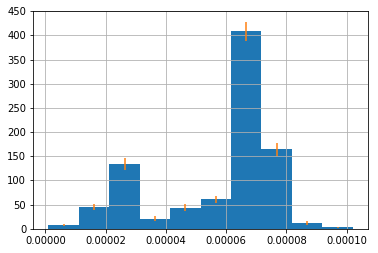

In [83]:
y, bin_edges = np.histogram(df_full['tempo cliente tcp'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_full['tempo cliente tcp'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

#### TEMPO COMUNICACAO

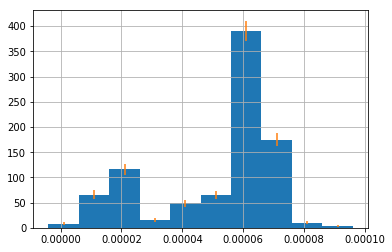

In [84]:
y, bin_edges = np.histogram(df_full['tempo transporte'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_full['tempo transporte'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

### Gráficos - TCP > UDP

#### TEMPO TOTAL

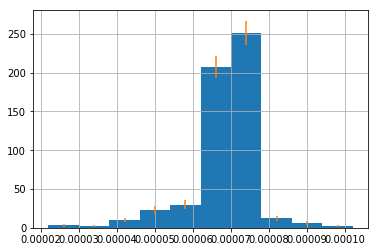

In [86]:
y, bin_edges = np.histogram(df_no_neg['tempo cliente tcp'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_no_neg['tempo cliente tcp'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

#### TEMPO COMUNICACAO

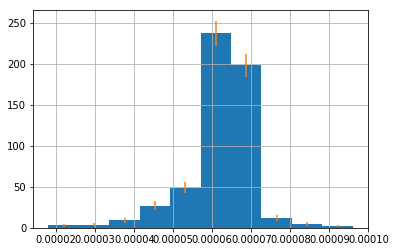

In [87]:
y, bin_edges = np.histogram(df_no_neg['tempo transporte'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_no_neg['tempo transporte'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

## Servidor UDP

### Cálculo da média, desvio padrão e intervalo de confiança - Todos os dados

#### TEMPO TOTAL

In [30]:
tempo_total = df_full['Tempo Total']
media_total = df_full['Tempo Total'].mean()
desvio_total = df_full['Tempo Total'].std()
intervalo_confianca_total = '(' + str(media_total - (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ',' + str(media_total + (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ')'

print("Informacoes UDP - TODOS OS DADOS - TEMPO TOTAL:")
print("Media: ", media_total)
print("Desvio Padrao: ", desvio_total)
print("Intervalo de Confiança: ", intervalo_confianca_total)

Informacoes UDP - TODOS OS DADOS - TEMPO TOTAL:
Media:  5.2851111111111115e-05
Desvio Padrao:  1.426392140030232e-05
Intervalo de Confiança:  (5.19192015796247e-05,5.378302064259753e-05)


#### TEMPO COMUNICACAO

In [31]:
tempo_comunicacao = df_full['Tempo de transporte']
media_comunicacao = df_full['Tempo de transporte'].mean()
desvio_comunicacao = df_full['Tempo de transporte'].std()
intervalo_confianca_comunicacao  = '(' + str(media_comunicacao - (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ',' + str(media_comunicacao + (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ')'

print("Informacoes UDP - TODOS OS DADOS - TEMPO COMUNICACAO:")
print("Media: ", media_comunicacao)
print("Desvio Padrao: ", desvio_comunicacao)
print("Intervalo de Confiança: ", intervalo_confianca_comunicacao)

Informacoes UDP - TODOS OS DADOS - TEMPO COMUNICACAO:
Media:  4.603222222222231e-05
Desvio Padrao:  1.4822721996348727e-05
Intervalo de Confiança:  (4.506380438512752e-05,4.7000640059317095e-05)


### Cálculo da média, desvio padrão e intervalo de confiança - Apenas dados TCP > UDP

#### TEMPO TOTAL

In [32]:
tempo_total = df_no_neg['Tempo Total']
media_total = df_no_neg['Tempo Total'].mean()
desvio_total = df_no_neg['Tempo Total'].std()
intervalo_confianca_total = '(' + str(media_total - (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ',' + str(media_total + (1.96 * (desvio_total/math.sqrt(len(tempo_total))))) + ')'

print("Informacoes UDP - DADOS EM QUE TCP > UDP - TEMPO TOTAL:")
print("Media: ", media_total)
print("Desvio Padrao: ", desvio_total)
print("Intervalo de Confiança: ", intervalo_confianca_total)

Informacoes UDP - DADOS EM QUE TCP > UDP - TEMPO TOTAL:
Media:  4.9120879120879064e-05
Desvio Padrao:  1.288267608375447e-05
Intervalo de Confiança:  (4.804027694615329e-05,5.020148129560484e-05)


#### TEMPO COMUNICACAO

In [33]:
tempo_comunicacao = df_no_neg['Tempo de transporte']
media_comunicacao = df_no_neg['Tempo de transporte'].mean()
desvio_comunicacao = df_no_neg['Tempo de transporte'].std()
intervalo_confianca_comunicacao  = '(' + str(media_comunicacao - (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ',' + str(media_comunicacao + (1.96 * (desvio_comunicacao/math.sqrt(len(tempo_comunicacao))))) + ')'

print("Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO COMUNICACAO:")
print("Media: ", media_comunicacao)
print("Desvio Padrao: ", desvio_comunicacao)
print("Intervalo de Confiança: ", intervalo_confianca_comunicacao)

Informacoes TCP - DADOS EM QUE TCP > UDP - TEMPO COMUNICACAO:
Media:  4.198168498168495e-05
Desvio Padrao:  1.3008664497864985e-05
Intervalo de Confiança:  (4.0890514866463506e-05,4.307285509690639e-05)


### Gráficos - Todos os Dados

#### TEMPO TOTAL

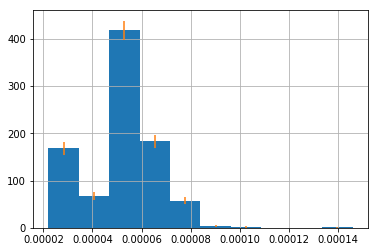

In [88]:
y, bin_edges = np.histogram(df_full['Tempo Total'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_full['Tempo Total'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

#### TEMPO COMUNICACAO

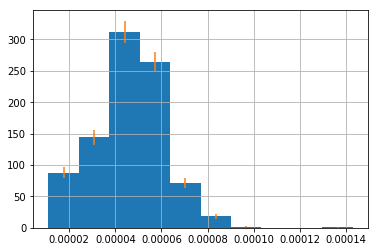

In [89]:
y, bin_edges = np.histogram(df_full['Tempo de transporte'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_full['Tempo de transporte'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

### Gráficos - TCP > UDP

#### TEMPO TOTAL

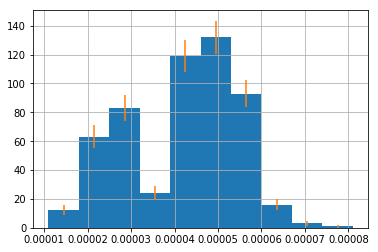

In [90]:
y, bin_edges = np.histogram(df_no_neg['Tempo de transporte'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_no_neg['Tempo de transporte'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()

#### TEMPO COMUNICACAO

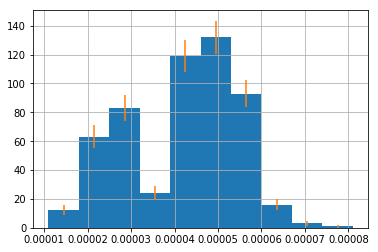

In [91]:
y, bin_edges = np.histogram(df_no_neg['Tempo de transporte'], bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
df_no_neg['Tempo de transporte'].hist(bins=10)
plt.errorbar(
    bin_centers,
    y,
    yerr = y ** 0.5,
    ls='none'
)
plt.show()